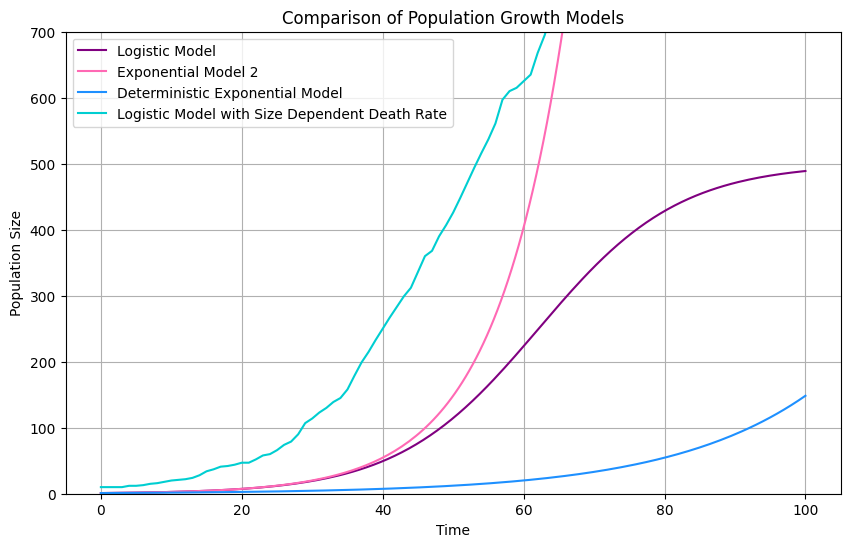

In [15]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters for each model
# Logistic Model Parameters
r_logistic = 0.1
K_logistic = 500
P0_logistic = 1

# Exponential Model 2 Parameters
r_exp2 = 0.1
P0_exp2 = 1

# Deterministic Exponential Model Parameters
r_deterministic = 0.05
P0_deterministic = 1

# Time points
t = np.linspace(0, 100, 200)

# Logistic growth model
P_logistic = K_logistic / (1 + ((K_logistic - P0_logistic) / P0_logistic) * np.exp(-r_logistic * t))

# Exponential growth model 2
P_exp2 = P0_exp2 * np.exp(r_exp2 * t)

# Deterministic exponential growth model
P_deterministic = P0_deterministic * np.exp(r_deterministic * t)

# Logistic Model with Size Dependent Death Rate
def set_parameters_with_size_dependent_death_rate(initial_population, birth_rate, base_death_rate, carrying_capacity):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'base_death_rate': base_death_rate,
        'carrying_capacity': carrying_capacity
    }

def run_simulation_with_size_dependent_death_rate(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    base_death_rate = params['base_death_rate']
    carrying_capacity = params['carrying_capacity']
    time_points = [0]
    population_sizes = [population]

    while population > 0:
        time_points.append(time_points[-1] + 1)
        births = np.random.poisson(birth_rate * population)
        size_dependent_death_rate = base_death_rate * (population / carrying_capacity)
        deaths = np.random.poisson(size_dependent_death_rate * population)
        population = max(0, population + births - deaths)
        population_sizes.append(population)

        if len(time_points) > 100:
            break

    return time_points, population_sizes

# Parameters for logistic model
params_logistic = set_parameters_with_size_dependent_death_rate(initial_population=10, birth_rate=0.1, base_death_rate=0.05, carrying_capacity=500)
time_points_logistic, population_sizes_logistic = run_simulation_with_size_dependent_death_rate(params_logistic)


# Plotting 
plt.figure(figsize=(10, 6))
plt.plot(t, P_logistic, color='purple', label='Logistic Model')
plt.plot(t, P_exp2, color='hotpink', label='Exponential Model 2')
plt.plot(t, P_deterministic, color='dodgerblue', label='Deterministic Exponential Model')
plt.plot(time_points_logistic, population_sizes_logistic, color='darkturquoise', label='Logistic Model with Size Dependent Death Rate')

plt.xlabel('Time')
plt.ylabel('Population Size')
plt.ylim(0, 700)
plt.title('Comparison of Population Growth Models')
plt.legend()
plt.grid(True)
plt.show()


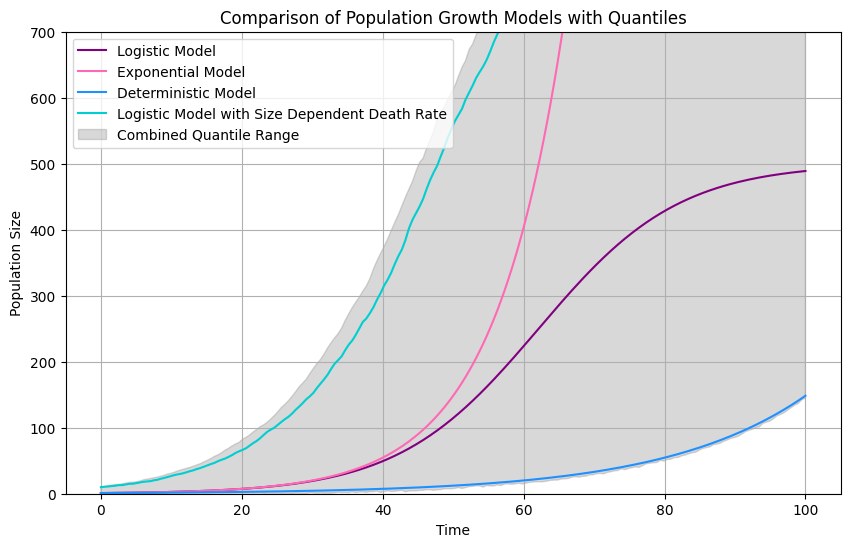

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for each model
# Logistic Model Parameters
r_logistic = 0.1
K_logistic = 500
P0_logistic = 1

# Exponential Model 2 Parameters
r_exp2 = 0.1
P0_exp2 = 1

# Deterministic Exponential Model Parameters
r_deterministic = 0.05
P0_deterministic = 1

# Time points
t = np.linspace(0, 100, 200)

# Logistic growth model
P_logistic = K_logistic / (1 + ((K_logistic - P0_logistic) / P0_logistic) * np.exp(-r_logistic * t))

# Exponential growth model 2
P_exp2 = P0_exp2 * np.exp(r_exp2 * t)

# Deterministic exponential growth model
P_deterministic = P0_deterministic * np.exp(r_deterministic * t)

# Logistic Model with Size Dependent Death Rate
def set_parameters_with_size_dependent_death_rate(initial_population, birth_rate, base_death_rate, carrying_capacity):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'base_death_rate': base_death_rate,
        'carrying_capacity': carrying_capacity
    }

def run_simulation_with_size_dependent_death_rate(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    base_death_rate = params['base_death_rate']
    carrying_capacity = params['carrying_capacity']
    time_points = [0]
    population_sizes = [population]

    while population > 0:
        time_points.append(time_points[-1] + 1)
        births = np.random.poisson(birth_rate * population)
        size_dependent_death_rate = base_death_rate * (population / carrying_capacity)
        deaths = np.random.poisson(size_dependent_death_rate * population)
        population = max(0, population + births - deaths)
        population_sizes.append(population)

        if len(time_points) > 100:
            break

    return time_points, population_sizes

# Parameters for logistic model with size dependent death rate
params_logistic = set_parameters_with_size_dependent_death_rate(initial_population=10, birth_rate=0.1, base_death_rate=0.05, carrying_capacity=500)

# Simulate multiple trajectories for all models
num_simulations = 100
combined_simulations = []

for _ in range(num_simulations):
    # Run simulations for each model
    _, population_sizes_logistic = run_simulation_with_size_dependent_death_rate(params_logistic)
    combined_simulations.append(np.interp(t, np.arange(len(population_sizes_logistic)), population_sizes_logistic))
    
combined_simulations = np.vstack([
    np.random.normal(loc=P_logistic, scale=5, size=(num_simulations, len(t))),
    np.random.normal(loc=P_exp2, scale=5, size=(num_simulations, len(t))),
    np.random.normal(loc=P_deterministic, scale=5, size=(num_simulations, len(t))),
    np.array(combined_simulations)
])

# Calculate combined quantiles
combined_lower_quantile = np.nanquantile(combined_simulations, 0.05, axis=0)
combined_upper_quantile = np.nanquantile(combined_simulations, 0.95, axis=0)

# Plotting models combined quantile
plt.figure(figsize=(10, 6))

# Logistic Model
plt.plot(t, P_logistic, label='Logistic Model', color='purple')

# Exponential Model 2
plt.plot(t, P_exp2, label='Exponential Model', color='hotpink')

# Deterministic Exponential Model
plt.plot(t, P_deterministic, label='Deterministic Model', color='dodgerblue')

# Logistic Model with Size Dependent Death Rate
plt.plot(t, np.median(combined_simulations[-num_simulations:], axis=0), color='darkturquoise', label='Logistic Model with Size Dependent Death Rate')

# Combined quantile range
plt.fill_between(t, combined_lower_quantile, combined_upper_quantile, color='gray', alpha=0.3, label='Combined Quantile Range')

plt.xlabel('Time')
plt.ylabel('Population Size')
plt.ylim(0, 700)
plt.title('Comparison of Population Growth Models with Quantiles')
plt.legend()
plt.grid(True)
plt.show()
